# Introduction

The dataset is “NASA Exoplanet Archive (July 2023)” from Kaggle shows confirmed exoplanets discovered as of July 2023 and its different characters like mass, density, eccentricity etc. All these datasets were recorded by different expeditions at different time period. The dataset contains 5470 rows and 26 subset columns (out of 353). Hence Dimension is:-  5470 X 26.

# TASK 1:- Problem Definition & Dataset Selection

#### Domain :- Astronomy 

This project explores the architecture, discovery, and characteristics of exoplanets using a dataset provided by NASA. It applies data analysis techniques to uncover insights relevant to modern astronomical research.

#### Source :- “NASA Exoplanet Archive (July 2023)” from Kaggle

The dataset is from trusted source (NASA) and real-world astrophysics relevant. It is rich in numerical, categorical, and temporal dataand Suitable for
both EDA and advanced techniques (like clustering, PCA, etc.)

#### Methods :- Data Cleaning, Analysis, Visualization, PCA, Clustering
The goal of this project is to explore, clean, and analyze confirmed exoplanets in the NASA Exoplanet Archive to uncover meaningful insights about: Earth-like exoplanets,Discovery trends,Solar system architecture,Host star characteristics,Planetary system structures


In [62]:
import pandas as pd
%matplotlib inline
# Define the important columns and load data
important_columns = [
    'pl_name', 'pl_orbper', 'pl_orbsmax','sy_snum',
    'pl_radj', 'discoverymethod','ra','dec','disc_year','rowupdate',
    'sy_pnum', 'st_teff', 'st_mass', 'st_rad', 'st_met',
    'sy_dist', 'pl_controv_flag','hostname','disc_facility','pl_rade',
    'pl_bmasse', 'pl_bmassj','pl_orbeccen','pl_eqt', 'pl_dens','pl_insol'
]

df = pd.read_csv("C:\\Users\\User\\Desktop\\NASA Exoplanet\\nea_full.csv", usecols=important_columns)

df


,pl_name,hostname,disc_year,discoverymethod,disc_facility,ra,dec,pl_orbper,pl_orbsmax,pl_orbeccen,...,rowupdate,pl_bmassj,pl_bmasse,st_teff,st_met,st_mass,st_rad,sy_snum,sy_pnum,sy_dist
0,OGLE-TR-10 b,OGLE-TR-10,2004,Transit,OGLE,267.867748,-29.876476,3.101278,0.0434,NaN,...,2014-05-14,0.62,197.046,5950.0,NaN,1.14,1.17,1,1,1344.9700
1,BD-08 2823 c,BD-08 2823,2009,Radial Velocity,La Silla Observatory,150.197196,-9.516569,237.600000,0.6800,0.190,...,2014-05-14,0.33,104.000,4746.0,-0.07,0.74,NaN,1,2,41.3342
2,HR 8799 c,HR 8799,2008,Imaging,Gemini Observatory,346.870149,21.134038,69000.000000,38.0000,NaN,...,2014-05-14,10.00,3000.000,NaN,-0.47,1.50,NaN,1,4,41.2441
3,HD 110014 b,HD 110014,2009,Radial Velocity,La Silla Observatory,189.811194,-7.995670,835.477000,2.1400,0.462,...,2014-05-14,11.09,3524.590,4445.0,0.19,2.17,20.90,1,1,100.7580
4,HIP 5158 b,HIP 5158,2009,Radial Velocity,La Silla Observatory,16.509489,-22.453613,345.720000,0.8900,0.520,...,2019-09-04,1.42,451.000,4962.0,0.10,0.78,NaN,1,2,51.6026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,Kepler-1986 b,Kepler-1986,2023,Transit,Kepler,292.958273,42.854891,19.548967,0.1307,0.000,...,2017-05-08,NaN,NaN,5549.0,-0.54,0.78,0.73,1,1,912.0850
5466,Kepler-1980 b,Kepler-1980,2023,Transit,Kepler,295.167207,38.637039,33.025718,0.2049,0.000,...,2017-05-08,NaN,NaN,5819.0,0.14,1.05,0.99,1,1,1709.4000
5467,Kepler-1996 c,Kepler-1996,2023,Transit,Kepler,285.253756,46.582218,92.729725,0.3608,0.000,...,2017-05-08,NaN,NaN,4580.0,0.08,0.75,0.68,1,2,440.5610
5468,Kepler-2001 c,Kepler-2001,2023,Transit,Kepler,291.659456,50.583858,14.092583,0.1084,0.000,...,2017-05-08,NaN,NaN,5081.0,0.12,0.86,0.77,1,2,776.5500


# TASK 2: Data Cleaning & Pre-processing 

### A) Cleaning duplicates:-

In [38]:
print("\n A) The number of duplicates in the dataset:-",df['pl_name'].duplicated().sum(),"\n\n")


 A) The number of duplicates in the dataset:- 0 




### B) Create new dataframe to retain some information

In [39]:
original = pd.DataFrame({
         'dec'                        : df['dec'],
         'ra'                         : df['ra'],
         'sy_snum'                    : df['sy_snum'], 
         'sy_pnum'                    : df['sy_pnum'],
         'pl_radius'                  : df['pl_rade'],
         'pl_Orbital Period'          : df['pl_orbper'],
         'sy_distance'                : df['sy_dist'] ,
         'pl_mass'                    : df['pl_bmasse'],
         'st_temperature'             : df['st_teff'], 
         'st_mass'                    : df['st_mass'], 
         'st_radius'                  : df['st_rad'], 
         'st_metallicity'             : df['st_met'],
         'pl_orbital semi-major axis' : df['pl_orbsmax'],
         'orbital_eccentricity'       : df['pl_orbeccen'],
         'pl_equilibrium temp'        : df['pl_eqt'],
         'planet_density'             : df['pl_dens'],
         'pl_insolation flux'         : df['pl_insol']})  

original

,dec,ra,sy_snum,sy_pnum,pl_radius,pl_Orbital Period,sy_distance,pl_mass,st_temperature,st_mass,st_radius,st_metallicity,pl_orbital semi-major axis,orbital_eccentricity,pl_equilibrium temp,planet_density,pl_insolation flux
0,-29.876476,267.867748,1,1,14.011,3.101278,1344.9700,197.046,5950.0,1.14,1.17,NaN,0.0434,NaN,NaN,0.4,NaN
1,-9.516569,150.197196,1,2,NaN,237.600000,41.3342,104.000,4746.0,0.74,NaN,-0.07,0.6800,0.190,NaN,NaN,NaN
2,21.134038,346.870149,1,4,13.000,69000.000000,41.2441,3000.000,NaN,1.50,NaN,-0.47,38.0000,NaN,NaN,NaN,NaN
3,-7.995670,189.811194,1,1,NaN,835.477000,100.7580,3524.590,4445.0,2.17,20.90,0.19,2.1400,0.462,NaN,NaN,NaN
4,-22.453613,16.509489,1,2,NaN,345.720000,51.6026,451.000,4962.0,0.78,NaN,0.10,0.8900,0.520,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5465,42.854891,292.958273,1,1,1.890,19.548967,912.0850,NaN,5549.0,0.78,0.73,-0.54,0.1307,0.000,579.0,NaN,26.62
5466,38.637039,295.167207,1,1,2.210,33.025718,1709.4000,NaN,5819.0,1.05,0.99,0.14,0.2049,0.000,564.0,NaN,23.95
5467,46.582218,285.253756,1,2,2.810,92.729725,440.5610,NaN,4580.0,0.75,0.68,0.08,0.3608,0.000,276.0,NaN,1.38
5468,50.583858,291.659456,1,2,1.820,14.092583,776.5500,NaN,5081.0,0.86,0.77,0.12,0.1084,0.000,597.0,NaN,30.10


### C) Cleaning null values 

#### (a) Check

In [40]:
print("\nA3)(a) Check for null:-\n")
print("Null values in Right Ascent        :-",df['ra'].isna().sum()) 
print("Null values in Declination         :-",df['dec'].isna().sum()) 
print("Null Values in Planet Name         :-",df['pl_name'].isna().sum())
print("Null values in Hostname            :-",df['hostname'].isna().sum())
print("Null values in Planet number       :-",df['sy_pnum' ].isna().sum())
print("Null values in Star count          :-",df['sy_snum'].isna().sum())
print("Null values in controversial flag  :-",df['pl_controv_flag'].isna().sum()) 
print("Null values in discovery year      :-",df['disc_year'].isna().sum())  
print("Null values in discovery facility  :-",df['disc_facility'].isna().sum()) 
print("Null values in discovery method    :-",df['discoverymethod'].isna().sum()) 

print("""\n\nThere are no null values for 10 columns. The columns are 'ra','dec','disc_year','sy_snum','controv_flag','hostname',disc_facility',
'discoverymethod','sy_pnum' and 'pl_name'\n\n""")

print("Null Values in Row update                   :-",df['rowupdate'].isna().sum()) 
print("Null Values in Distance from earth          :-",df['sy_dist'].isna().sum())
print("Null Values in Orbital Period               :-",df['pl_orbper'].isna().sum())
print("Null Values in Star effective temperature   :-",df['st_teff'].isnull().sum())
print("Null Values in Star radius                  :-",df['st_rad'].isna().sum())
print("Null Values in Star mass                    :-",df['st_mass'].isna().sum())
print("\n\nThe columns with more than 1000 null values are:-")
print("Null Values in Planet radius                :-",df['pl_rade'].isna().sum()) 
print("Null Values in Planet radius w.r.t jupyter  :-",df['pl_radj'].isna().sum())   
print("Null Values in Star metallicity             :-",df['st_met'].isna().sum())    
print("Null Values in Orbital semi-major axis      :-",df['pl_orbsmax'].isna().sum())
#print("With lot of nulls/n")
print("Null Values in Planet mass w.r.t jupyter    :-",df['pl_bmassj'].isna().sum())
print("Null Values in Planet mass w.r.t earth      :-",df['pl_bmasse'].isna().sum()) 
print("Null Values in Orbital eccentricity         :-",df['pl_orbeccen'].isna().sum())
print("Null Values in planet equilibrium temp      :-",df['pl_eqt'].isna().sum()) 
print("Null Values in planet density               :-",df['pl_dens'].isna().sum()) 
print("Null Values in Insolation Flux              :-",df['pl_insol'].isna().sum())

print("Before imputation,for accuracy of some processes we can retain some of the original columns from the dataset in a new dataframe named original.")



A3)(a) Check for null:-

Null values in Right Ascent        :- 0
Null values in Declination         :- 0
Null Values in Planet Name         :- 0
Null values in Hostname            :- 0
Null values in Planet number       :- 0
Null values in Star count          :- 0
Null values in controversial flag  :- 0
Null values in discovery year      :- 0
Null values in discovery facility  :- 0
Null values in discovery method    :- 0


There are no null values for 10 columns. The columns are 'ra','dec','disc_year','sy_snum','controv_flag','hostname',disc_facility',
'discoverymethod','sy_pnum' and 'pl_name'


Null Values in Row update                   :- 1
Null Values in Distance from earth          :- 119
Null Values in Orbital Period               :- 243
Null Values in Star effective temperature   :- 596
Null Values in Star radius                  :- 686
Null Values in Star mass                    :- 758


The columns with more than 1000 null values are:-
Null Values in Planet radius            

#### (b) Imputation

In [41]:
#A3)(b) Imputation

# Imputation of null values using mean of each columns
import os
os.environ["OMP_NUM_THREADS"] = "1"


df['sy_dist']=df['sy_dist'].fillna(df['sy_dist'].mean())
df['pl_orbper']=df['pl_orbper'].fillna(df['pl_orbper'].mean())
df['st_teff']=df['st_teff'].fillna(df['st_teff'].mean())
df['st_rad']=df['st_rad'].fillna(df['st_rad'].mean())
df['st_mass']=df['st_mass'].fillna(df['st_mass'].mean())
df['pl_rade']=df['pl_rade'].fillna(df['pl_rade'].mean())
df['pl_radj']=df['pl_radj'].fillna(df['pl_radj'].mean())
df['st_met']=df['st_met'].fillna(df['st_met'].mean())
df['pl_orbsmax']=df['pl_orbsmax'].fillna(df['pl_orbsmax'].mean())
df['pl_bmassj']=df['pl_bmassj'].fillna(df['pl_bmassj'].mean())
df['pl_bmasse']=df['pl_bmasse'].fillna(df['pl_bmasse'].mean())
df['pl_orbeccen']=df['pl_orbeccen'].fillna(df['pl_orbeccen'].mean())
df['pl_eqt']=df['pl_eqt'].fillna(df['pl_eqt'].mean())
#df['pl_dens']=df['pl_dens'].fillna(df['pl_dens'].mean())



from sklearn.impute import KNNImputer

## Impute selected columns usnig KNN imputer 
cols_to_impute = ['pl_rade','pl_radj','st_met','pl_orbsmax','pl_bmassj', 'pl_bmasse', 'pl_orbeccen', 'pl_eqt', 'pl_dens']
imputer = KNNImputer(n_neighbors=5)
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

print("After mean imputation :-")
print("Row update       :-",df['rowupdate'].isna().sum()) 
print("Distance         :-",df['sy_dist'].isna().sum())
print("Orbital Period   :-",df['pl_orbper'].isna().sum())
print("Star effective   :-",df['st_teff'].isnull().sum())
print("Star radius      :-",df['st_rad'].isna().sum())
print("Star mass        :-",df['st_mass'].isna().sum())

print("\n\nAfter KNN Imputations:-")
print("Planet radius                 :-",df['pl_rade'].isna().sum()) 
print("Planet radius w.r.t jupyter   :-",df['pl_radj'].isna().sum())   
print("Star metallicity              :-",df['st_met'].isna().sum())    
print("Orbital semi-major axis       :-",df['pl_orbsmax'].isna().sum())
print("Planet mass w.r.t jupyter     :-",df['pl_bmassj'].isna().sum())
print("Planet mass w.r.t earth       :-",df['pl_bmasse'].isna().sum()) 
print("Planet orbital eccentricity   :-",df['pl_orbeccen'].isna().sum())
print("Planet efective temperature   :-",df['pl_eqt'].isna().sum()) 
print("Planet density                :-",df['pl_dens'].isna().sum()) 
#print(df['pl_insol'].isna().sum())

After mean imputation :-
Row update       :- 1
Distance         :- 0
Orbital Period   :- 0
Star effective   :- 0
Star radius      :- 0
Star mass        :- 0


After KNN Imputations:-
Planet radius                 :- 0
Planet radius w.r.t jupyter   :- 0
Star metallicity              :- 0
Orbital semi-major axis       :- 0
Planet mass w.r.t jupyter     :- 0
Planet mass w.r.t earth       :- 0
Planet orbital eccentricity   :- 0
Planet efective temperature   :- 0
Planet density                :- 0


# TASK 3: EDA & Visualizations 

## A) Finding Interesting fact(Univariative)

#### A1) The shape of dataset

In [42]:
#  A1) :- Finding Interesting fact
print("A1)")
print("The number of rows:-",len(df))
print("The number of columns:-",len(df.columns))

A1)
The number of rows:- 5470
The number of columns:- 26


#### A2) The exoplanet system with most number of exoplanets 

In [43]:
#A2) Exoplanet system with most number of exoplanets is:-
print("A2)")
print(df.groupby('hostname')['sy_pnum'].count().sort_values(ascending=False).head(2))
print("\n\n The Star named KOI-351 has most planets around it.The details of all 8 planets are:-\n\n ")
df[df['hostname'] == 'KOI-351']

A2)
hostname
KOI-351       8
TRAPPIST-1    7
Name: sy_pnum, dtype: int64


 The Star named KOI-351 has most planets around it.The details of all 8 planets are:-

 


,pl_name,hostname,disc_year,discoverymethod,disc_facility,ra,dec,pl_orbper,pl_orbsmax,pl_orbeccen,...,rowupdate,pl_bmassj,pl_bmasse,st_teff,st_met,st_mass,st_rad,sy_snum,sy_pnum,sy_dist
3186,KOI-351 b,KOI-351,2013,Transit,Kepler,284.433464,49.305124,7.008151,0.074000,0.155289,...,2014-05-14,2.414044,767.11718,6080.0,-0.120,1.20,1.20,1,8,848.254
3217,KOI-351 c,KOI-351,2013,Transit,Kepler,284.433464,49.305124,8.719375,0.089000,0.155289,...,2014-05-14,2.414044,767.11718,6080.0,-0.120,1.20,1.20,1,8,848.254
3226,Kepler-90 i,KOI-351,2017,Transit,Kepler,284.433464,49.305124,14.449120,10.512057,0.155289,...,2017-12-12,2.414044,767.11718,6015.0,0.098,1.12,1.29,1,8,848.254
3393,KOI-351 e,KOI-351,2013,Transit,Kepler,284.433464,49.305124,91.939130,0.420000,0.155289,...,2014-05-14,2.414044,767.11718,6080.0,-0.120,1.20,1.20,1,8,848.254
4535,KOI-351 g,KOI-351,2013,Transit,Kepler,284.433464,49.305124,210.606970,0.710000,0.155289,...,2014-05-14,2.414044,767.11718,6080.0,-0.120,1.20,1.20,1,8,848.254
4800,KOI-351 h,KOI-351,2013,Transit,Kepler,284.433464,49.305124,331.600590,1.010000,0.155289,...,2014-05-14,2.414044,767.11718,6080.0,-0.120,1.20,1.20,1,8,848.254
4900,KOI-351 f,KOI-351,2013,Transit,Kepler,284.433464,49.305124,124.914400,0.480000,0.155289,...,2014-05-14,2.414044,767.11718,6080.0,-0.120,1.20,1.20,1,8,848.254
5228,KOI-351 d,KOI-351,2013,Transit,Kepler,284.433464,49.305124,59.736670,0.320000,0.155289,...,2014-05-14,2.414044,767.11718,6080.0,-0.120,1.20,1.20,1,8,848.254


#### A3) The 10 most nearest exoplanets to our system 

In [44]:
# A3) 10 nearest exoplanets to our system 

print("A3)")
nearest = df.sort_values(by='sy_dist')

print("\nThe nearest 10 exoplanets are:-\n\n")
# Show top 10 closest systems
nearest[['pl_name', 'hostname', 'sy_dist']].head(10)

A3)

The nearest 10 exoplanets are:-




,pl_name,hostname,sy_dist
4215,Proxima Cen b,Proxima Cen,1.30119
1198,eps Eri b,eps Eri,3.20260
2428,GJ 887 c,GJ 887,3.29000
2675,GJ 887 b,GJ 887,3.29000
3519,Ross 128 b,Ross 128,3.37454
2278,GJ 15 A c,GJ 15 A,3.56228
2277,GJ 15 A b,GJ 15 A,3.56228
1751,tau Cet h,tau Cet,3.60304
3438,tau Cet e,tau Cet,3.60304
1750,tau Cet g,tau Cet,3.60304


#### A4) The solar systems most nearer and farther

In [45]:
# A4) Systems most nearer and farther:- 
print("A4)")
details = ['pl_name', 'hostname', 'sy_dist', 'disc_year', 'st_teff', 'pl_orbper','pl_orbsmax']
min_dist = df['sy_dist'].idxmin()
max_dist = df['sy_dist'].idxmax()
display('The nearest exoplanet ever found:-',df.loc[[min_dist],details])
display("The farthest exoplanet ever found:-",df.loc[[max_dist],details])

A4)


'The nearest exoplanet ever found:-'

,pl_name,hostname,sy_dist,disc_year,st_teff,pl_orbper,pl_orbsmax
4215,Proxima Cen b,Proxima Cen,1.30119,2016,2900.0,11.1868,0.04856


'The farthest exoplanet ever found:-'

,pl_name,hostname,sy_dist,disc_year,st_teff,pl_orbper,pl_orbsmax
491,KMT-2021-BLG-1077L b,KMT-2021-BLG-1077L,8240.0,2022,5431.923379,81789.595534,1.26


#### A5) Solar systems with different numbers of host stars.

In [46]:
 #A5)
## A5) Count of systems with different number of host stars.

print("A5)")
For_count = df.groupby('hostname')['sy_snum'].first()
#print(For_count)
count_sys = For_count.value_counts().sort_index()
#print(count_sys)
print(f"There are total number of {df['pl_name'].nunique()} exoplanets and {For_count.count()} systems ever found till.Out of it:- ")

#print("The number of stars found :- ",df['hostname'].nunique())
print("\nThe number of exoplanets with 1 star:-",count_sys.get(1,0))
print("The number of exoplanets with 2 stars:-:", count_sys.get(2,0))
print("The number of exoplanets with 3 stars:-",count_sys.get(3,0))
print("The number of exoplanets with 4 stars:-",count_sys.get(4,0))
print(f"\nThere are only {count_sys.get(4,0)} systems with 4 stars.The planets with 4 stars are :-",df[df['sy_snum'] == 4]['pl_name'].unique())
#df['pl_name'].nunique()

A5)
There are total number of 5470 exoplanets and 4074 systems ever found till.Out of it:- 

The number of exoplanets with 1 star:- 3710
The number of exoplanets with 2 stars:-: 320
The number of exoplanets with 3 stars:- 42
The number of exoplanets with 4 stars:- 2

There are only 2 systems with 4 stars.The planets with 4 stars are :- ['30 Ari B b' 'PH1 b']


#### A6) Overview of frequently used exoplanet discovery methods and facilities

In [47]:
## A6) Overview of frequently used exoplanet discovery methods and facilities.

print("A6)")
most_method = df['discoverymethod'].value_counts().sort_values(ascending = False)
#print(most)
print("The most used discovery method is:-\n",most_method.index[0],most_method.iloc[0],"\n\n")

most_facility = df['disc_facility'].value_counts().sort_values(ascending = False)
print("The most used discovery facility is:-\n",most_facility.index[0],most_facility.iloc[0],"\n\n")


both = ((df['discoverymethod'] == 'Transit') & (df['disc_facility'] == 'Kepler')).sum()
print("Number of times Transit method used Kepler facility:-",both)

#print(df['disc_facility'].nunique())
print("\nAll the counts of discovery methods who uses Kepler facility:-\n",df[df['disc_facility']=='Kepler']['discoverymethod'].value_counts())

A6)
The most used discovery method is:-
 Transit 4092 


The most used discovery facility is:-
 Kepler 2778 


Number of times Transit method used Kepler facility:- 2746

All the counts of discovery methods who uses Kepler facility:-
 discoverymethod
Transit                          2746
Transit Timing Variations          20
Orbital Brightness Modulation       9
Eclipse Timing Variations           2
Pulsation Timing Variations         1
Name: count, dtype: int64


## B) Discoveries per year using Line chart (Bivariative)


 The years in which exoplanets where discovered are:-
[1992 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023]


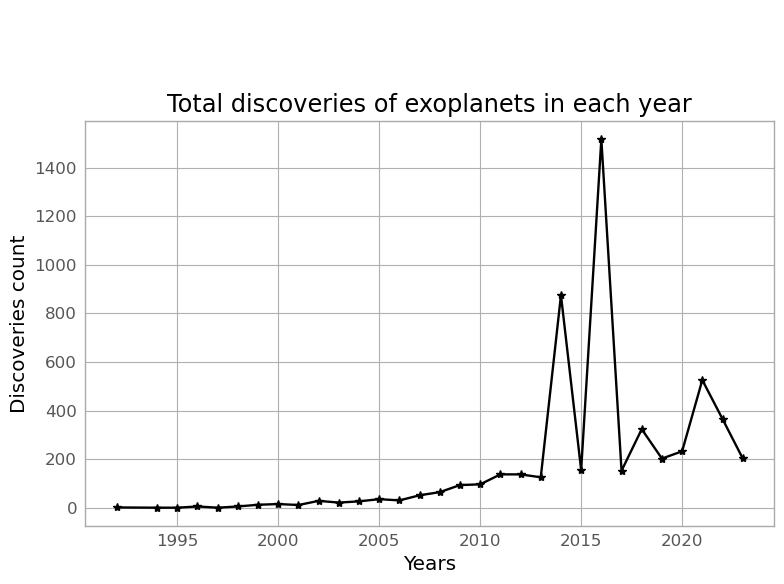

INTERPRETATION :- The exoplanet discovery peaked at 2016 with 1517 number of discoveries and was lowest at 1994 with
1 discoveries.


In [48]:
# B) Total discoveries per year using Line Chart

import matplotlib.pyplot as plot

x = df['disc_year'].unique()
x.sort()
print("\n The years in which exoplanets where discovered are:-")
print (x)

y = df['disc_year'].value_counts().sort_index()
#print(y)

plot.plot(x,y,color='black',marker='*')
plot.title('\n\n\nTotal discoveries of exoplanets in each year')
plot.xlabel('Years')
plot.ylabel('Discoveries count')
plot.grid(True)
plot.xticks(rotation=0)
plot.tight_layout()
plot.show()

print(f"""INTERPRETATION :- The exoplanet discovery peaked at {y.idxmax()} with {y.max()} number of discoveries and was lowest at {y.idxmin()} with
{y.min()} discoveries.""")

## C) Distribution of similar exoplanets from earth using K-Means (Multivariative)

For clustering the exoplanets, we are analysing features like pl_orb,pl_rade,pl_bmasse,pl_orbsmax of the exoplanets


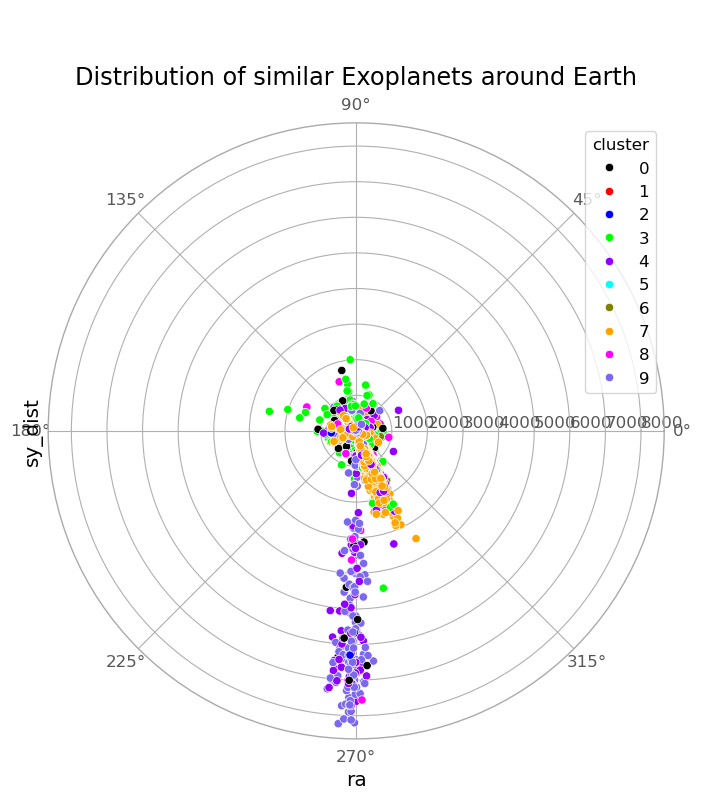




 INTERPRETATION :- This is the distribution of exoplantes from earth which shows most exoplanets are found at about 270 degree radius.
From the chart,it is obvious there is no clear pattern for similarity in exoplanets and all clusters are more popular near our solar system but 
 clusters 0 and 1 are more popular at longer rage at 270 degree from earth.


The cluster ranges of each of 10 clusters are:-
             pl_orbper                  pl_rade           pl_bmasse  \
                  min           max        min     max         min   
cluster                                                              
0        1.512140e+00  8.178960e+04   2.660000  12.733  1570.08020   
1        4.020000e+08  4.020000e+08  12.442000  12.442  2002.31896   
2        1.217514e+00  8.178960e+04   4.256876  33.600  5689.15700   
3        6.724741e-01  8.040000e+06   9.528000  77.342     7.60000   
4        2.197000e-01  8.178960e+04   3.180000   9.300   444.96200   
5        8.178960e+04  8.17896

In [49]:
# C) Distribution of similar exoplanets from earth using K-Means

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = df[['pl_orbper', 'pl_rade', 'pl_bmasse','pl_orbsmax']].dropna()
to_drop = df[['pl_orbper', 'pl_rade', 'pl_bmasse','ra','sy_dist']].dropna()
print("For clustering the exoplanets, we are analysing features like pl_orb,pl_rade,pl_bmasse,pl_orbsmax of the exoplanets" )

X = StandardScaler().fit_transform(features)
kmeans = KMeans(n_clusters=10, random_state=42)
features['cluster'] = kmeans.fit_predict(X)


if 'ra' in to_drop.columns:
    theta = np.deg2rad(to_drop['ra'])


# Distance in polar plot (distance from Earth)
r = to_drop['sy_dist']

# Plot
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)

custom_palette = [
    "#000000", "#FF0000", "#0000FF", "#00FF00", "#8F00FF",
    "#00FFFF", "#808000", "#FFA500", "#FF00FF", "#7B68EE"                       #"#1E90FF"
]


#ax.scatter(theta, r, alpha=0.6, s=5, c='skyblue')
sns.scatterplot(data=df, x = theta, y = r,hue=features['cluster'],palette = custom_palette)
ax.set_title("\n\nDistribution of similar Exoplanets around Earth", va='bottom')
ax.set_rlabel_position(0)
ax.grid(True)
plt.show()

print("""\n\n\n INTERPRETATION :- This is the distribution of exoplantes from earth which shows most exoplanets are found at about 270 degree radius.
From the chart,it is obvious there is no clear pattern for similarity in exoplanets and all clusters are more popular near our solar system but 
 clusters 0 and 1 are more popular at longer rage at 270 degree from earth.\n\n""")

ranges = features.groupby('cluster').agg(['min','max'])
print("The cluster ranges of each of 10 clusters are:-\n",ranges)

counts = features['cluster'].value_counts().sort_index()
print(counts)




## D) Exploring earth-like exoplantes(Multivariative):-

#### D1) Finding earthlike exoplanets or most reated to earth

In [50]:
#D1) Finding earthlike exoplanets or most reated to earth.

print("\nE1) To Compare with earth, we have to know the earth details first.They are:- ")
print("\nThe earth have equibilirium temperature(pl_eqt) = 255K, Orbital Eccentricity(pl_orbeccen ) = 0.016 and Suns effective"
"temperature(st_teff) is 5778.\nThe other values like radius,Energy received(pl_insol),distance from star(pl_orbsmax) are given in relation"
"to earth.\nHence comparing these values to find exoplanets similar to earth.")

# Filter for Earth-like / potentially habitable candidates
earth_like = df[
    (df['pl_rade'].between(0.5, 2, inclusive='both')) & #df['pl_rade'].isnull()|
    #(df['pl_bmasse'].isnull()|df['pl_bmasse'].between(0, 10, inclusive='both')) &
    (df['pl_eqt'].between(200, 290, inclusive='both')) & #df['pl_eqt'].isnull()|
    (df['st_teff'].between(4500, 6500, inclusive='both')) &
    (df['pl_orbeccen'].isnull() | df['pl_orbeccen'].between(0, 0.3)) & 
    (df['pl_insol'].isnull() | df['pl_insol'].between(0.5, 1.5)) &
    ( df['pl_orbsmax'].between(0, 2,inclusive='both'))
]

top_earth_like = earth_like[['pl_name', 'hostname', 'pl_rade', 'pl_bmasse', 'pl_eqt', 'st_teff', 'pl_orbper','pl_insol','pl_orbsmax','ra',
                             'dec','sy_dist']]
print("\n\n")
top_earth_like


E1) To Compare with earth, we have to know the earth details first.They are:- 

The earth have equibilirium temperature(pl_eqt) = 255K, Orbital Eccentricity(pl_orbeccen ) = 0.016 and Suns effectivetemperature(st_teff) is 5778.
The other values like radius,Energy received(pl_insol),distance from star(pl_orbsmax) are given in relationto earth.
Hence comparing these values to find exoplanets similar to earth.





,pl_name,hostname,pl_rade,pl_bmasse,pl_eqt,st_teff,pl_orbper,pl_insol,pl_orbsmax,ra,dec,sy_dist
4053,Kepler-62 e,Kepler-62,1.61,36.00000,270.0,4925.0,122.3874,NaN,0.427,283.212562,45.349699,300.874
4178,Kepler-62 f,Kepler-62,1.41,35.00000,208.0,4925.0,267.2910,NaN,0.718,283.212562,45.349699,300.874
5261,Kepler-452 b,Kepler-452,1.63,767.11718,265.0,5757.0,384.8430,1.1,1.046,296.003752,44.277586,551.727


#### D2) Direction and distance of earth-like planets from earth

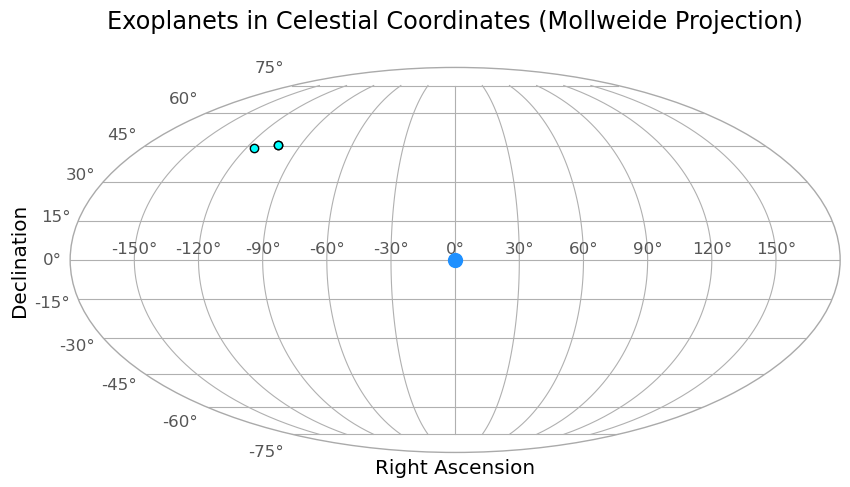

In [51]:

#D2) Direction and distance of earth-like planets from earth.

import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

value = top_earth_like.iloc[0, top_earth_like.columns.get_loc('pl_rade')]
#print(value)

ra_starplot = top_earth_like['ra']
dec_starplot = top_earth_like['dec']

ra_rad = np.deg2rad(ra_starplot)
dec_rad = np.deg2rad(dec_starplot)

#value_rad = np.deg2rad(value)


ra_rad = np.remainder(ra_rad + 2*np.pi, 2*np.pi)  # Wrap
ra_rad = -(ra_rad - np.pi)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='mollweide')
ax.scatter(ra_rad, dec_rad, marker='o', color='cyan', edgecolor='black')
ax.scatter(0, 0, c='dodgerblue', s=100, label='Earth') 


ax.grid(True)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_title('Exoplanets in Celestial Coordinates (Mollweide Projection)', y=1.08)

plt.show()

#### D3) Comparison of properties using Radar chart

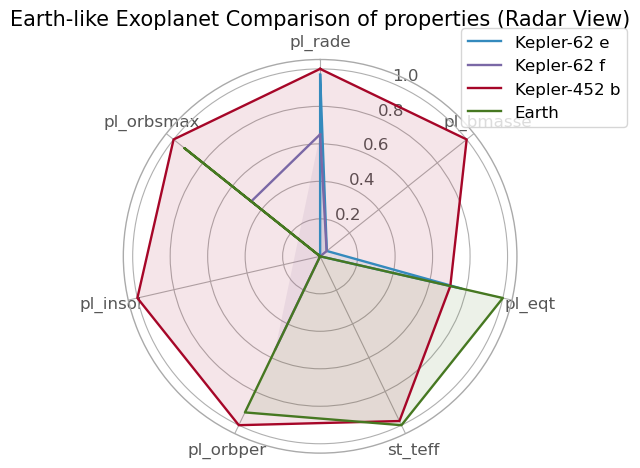

INTERPRETATION:- 1) The graph shows the difference in properties of earth and earth-like exoplanets.The earth and sun has more effective
temperature than other 3 planets and their host-stars which indicates a chance for correlation between both planet and star temperature. 

2) The Kepler-452 b is slightly higher than earth in Orbital axis and period.It is bigger in radius and insol. Hence, the temperature variation 
doesn't affect the light passing

3) Kepler-62 e has more planetary mass than all others including earth. 


In [52]:
# D3) Comparison of properties using Radar chart
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Normalize the feature data
top_earth = top_earth_like.drop(['pl_name','hostname','ra','dec','sy_dist'], axis=1)
earth = {'pl_rade':1.0,'pl_bmasse': 1.0,'pl_eqt': 288,'st_teff': 5778,'pl_orbper': 365,'pl_insol': 1.0,'pl_orbsmax': 1.0}
earth_df = pd.DataFrame([earth])
top_earth = pd.concat([top_earth,earth_df])
#print(top_earth)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(top_earth)


# Put normalized data into a DataFrame
planet_names = ['Kepler-62 e', 'Kepler-62 f', 'Kepler-452 b','Earth']
df_scaled = pd.DataFrame(normalized_data, columns=top_earth.columns, index=planet_names)
df_scaled = df_scaled.T
df_scaled.insert(0, 'Feature', df_scaled.index) 

# For radar setup:- 
labels = df_scaled['Feature'].tolist()
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Step 6: Plot each planet
for planet in df_scaled.columns[1:]:
    values = df_scaled[planet].tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=planet)
    ax.fill(angles, values, alpha=0.1)

# Step 7: Final chart setup
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Earth-like Exoplanet Comparison of properties (Radar View)", size=15)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()


print("""INTERPRETATION:- 1) The graph shows the difference in properties of earth and earth-like exoplanets.The earth and sun has more effective
temperature than other 3 planets and their host-stars which indicates a chance for correlation between both planet and star temperature. 

2) The Kepler-452 b is slightly higher than earth in Orbital axis and period.It is bigger in radius and insol. Hence, the temperature variation 
doesn't affect the light passing

3) Kepler-62 e has more planetary mass than all others including earth. """)

## E) Study of  correlations(Multivariative):-

#### E1) Analysing properties of Stars, Planets and Solar systems using PCA and plot it in 2D 

F1) In PCA, for accuracy we use the unimputed original dataframe and remove nulls.
         Hence, after removing nulls the remaining columns are:- 451


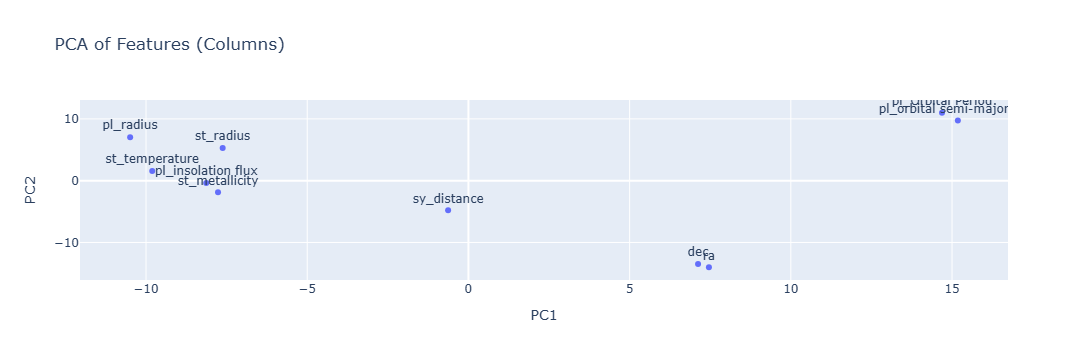



 Note :- The star properties like radius, metallicity, temperature are negatively correlated with planet Orbital period, eccentricity which 
         indicate that cooler, smaller stars have larger orbital periods and eccentricities.

There is no correlation for declination and ra with orbital or host star properties.

Right Ascension, Declination and Distance are positively correlated. The Orbital period, eccentricity and Semi-major axis are closely related
and those planetary features 


In [53]:

## F1) Analysing properties of Stars, Planets and Solar systems using PCA and plot it in 2D  

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plot

%matplotlib inline

df['discovry_method'] = df['discoverymethod'].astype('category').cat.codes 
df['disc_fac'] = df['disc_facility'].astype('category').cat.codes
feature_names = ['dec', 'ra', 'sy_distance', 'pl_radius', 'pl_orbital semi-major axis','pl_Orbital Period','st_temperature','st_radius','st_metallicity','pl_insolation flux']
#df['pl_bmasse_withnull'],'discovry_method','disc_fac'
data = original[feature_names].dropna()# Drop rows with NaNs

print("""F1) In PCA, for accuracy we use the unimputed original dataframe and remove nulls.
         Hence, after removing nulls the remaining columns are:-""",data.shape[0])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_transposed = X_scaled.T  # Now shape is (7 features, N samples)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_transposed)

# Plot with column names as labels
#plot.figure(figsize=(12, 6))
fig = px.scatter(
    x=principal_components[:, 0],
    y=principal_components[:, 1],
    text=feature_names,  # <-- Label each point with the feature name
    labels={'x': 'PC1', 'y': 'PC2'},
    title='PCA of Features (Columns)'
)

fig.update_traces(textposition='top center')
fig.show()


print("""\n\n Note :- The star properties like radius, metallicity, temperature are negatively correlated with planet Orbital period, eccentricity which 
         indicate that cooler, smaller stars have larger orbital periods and eccentricities.""")

print("\nThere is no correlation for declination and ra with orbital or host star properties.")
      #"Larger planets may tend to have larger radii, masses, and orbital semi-major axes.")
print("""\nRight Ascension, Declination and Distance are positively correlated. The Orbital period, eccentricity and Semi-major axis are closely related
and those planetary features """)

#### E2) Heatmap

<class 'dict'>
 F2) After removing nulls for accuracy, the remaining number of rows are: 1939


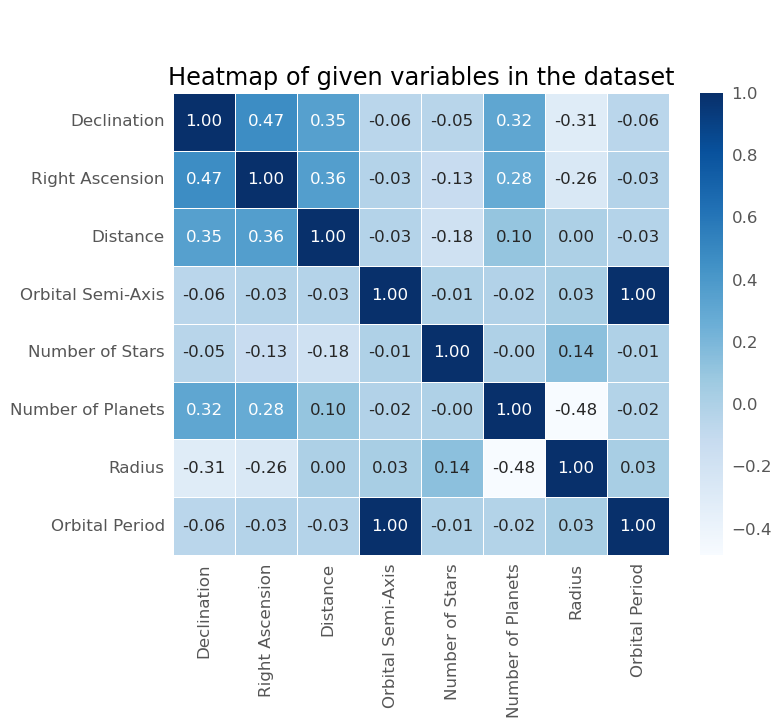



 INTEPRETATION:- The symmetric matrix shows a suprising correlations of the declination and righ ascenation with distance 
as well as number of planets in the system which shows direction and position might affect the number of planets in a system.

The number of planet in the system is slightly negative correlated to radius which indicates that if the size of planets increases,the number
of planets in the system might shrink.


In [54]:

# E2) Heatmap

import seaborn as sns

#print(df['sy_dist_withnull'].isna().sum())
#print(df['pl_orbper_withnull'].isna().sum())
#print(df['pl_rade_withnull'].isna().sum())
#print(df['pl_orbsmax_withnull'].isna().sum())

df['discovry_method'] = df['discoverymethod'].astype('category').cat.codes 
df['disc_fac'] = df['disc_facility'].astype('category').cat.codes

Heat = {
    'Declination'        : df['dec'],
    'Right Ascension'    : df['ra'],
    'Distance'           : original['sy_distance'],
    'Orbital Semi-Axis'  : original['pl_orbital semi-major axis'],
    #'Discovery method'  : df['discovry_method'],
    'Number of Stars'    : df['sy_snum'],
    'Number of Planets'  : df['sy_pnum'],
    #'Discovery Facility': df['disc_fac'],
    'Radius': original['pl_radius'],
    'Orbital Period':original['pl_Orbital Period'],
    #'Mass': df['pl_bmasse_withnull']
    
     }
print(type(Heat))
#print(df['pl_orbsmax_withnull'].count())
#print(df['pl_orbsmax_withnull'].isna().sum())
#print(df['pl_orbsmax_withnull'].dropna().count())

dm = pd.DataFrame(Heat)
dm_clean = dm.dropna()
print(" F2) After removing nulls for accuracy, the remaining number of rows are:", dm_clean.shape[0])
correlon_matrix = dm_clean.corr()

#print("Correlation Matrix of 5 given variables:\n", correlon_matrix)

plot.figure(figsize=(8, 6))
sns.heatmap(correlon_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=.5)
plot.title("\n\nHeatmap of given variables in the dataset")
plot.show()

print("""\n\n INTEPRETATION:- The symmetric matrix shows a suprising correlations of the declination and righ ascenation with distance 
as well as number of planets in the system which shows direction and position might affect the number of planets in a system.

The number of planet in the system is slightly negative correlated to radius which indicates that if the size of planets increases,the number
of planets in the system might shrink.""")

#### E3) Count of total number of unique discovery facilities associated with each discovery method(Bivariative)

F3) There are 11 discovery methods and 70 facilities to find exoplanets.




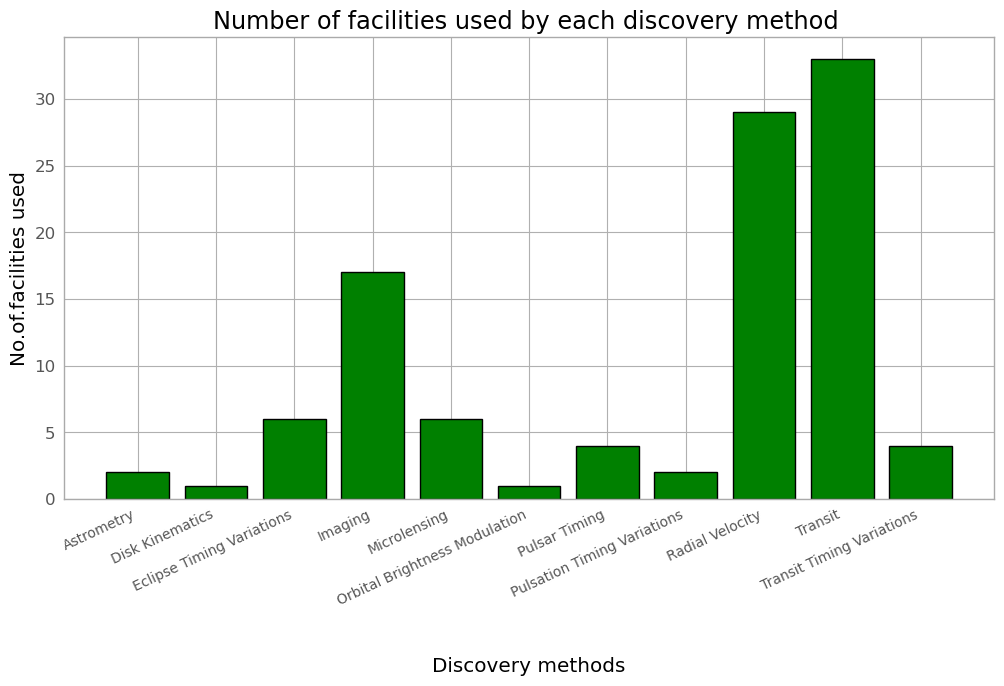

REMARKS:- Transit method uses most facilities(33), Radial velocity uses 29 and Imaging method uses 17 facilities


In [55]:

# E3) Count of total number of unique discovery facilities associated with each discovery method,

import matplotlib.pyplot as plot
import numpy as np

print (f"F3) There are {df['discoverymethod'].nunique()} discovery methods and {df['disc_facility'].nunique()} facilities to find exoplanets.\n\n")
x=df.groupby('discoverymethod')['disc_facility'].nunique()#.sort_values(ascending=False)
methods = x.index
counts = x.values
#print(counts)

# Bar Chart:-
plot.figure(figsize=(12, 6))
plot.bar(methods,counts,edgecolor='black',color="green") 
x_ticks = np.arange(0, 41, 1)
plot.xticks(rotation=25, ha='right', fontsize=10)
plot.xlabel("\n\nDiscovery methods")
plot.ylabel("No.of.facilities used")
plot.title("Number of facilities used by each discovery method ")
plot.show()

print("REMARKS:- Transit method uses most facilities(33), Radial velocity uses 29 and Imaging method uses 17 facilities")


#### E4) Plotting discovery facilities involved in more than one discovery methods:-


Facilities used in multiple methods: 20

OGLE: {'Transit', 'Microlensing'}
La Silla Observatory: {'Radial Velocity', 'Transit'}
Kepler: {'Orbital Brightness Modulation', 'Transit Timing Variations', 'Eclipse Timing Variations', 'Transit', 'Pulsation Timing Variations'}
Hubble Space Telescope: {'Imaging', 'Transit', 'Pulsar Timing'}
W. M. Keck Observatory: {'Radial Velocity', 'Imaging'}
SuperWASP: {'Radial Velocity', 'Transit'}
K2: {'Transit', 'Microlensing'}
Multiple Observatories: {'Radial Velocity', 'Transit Timing Variations', 'Eclipse Timing Variations', 'Imaging', 'Transit', 'Microlensing', 'Pulsation Timing Variations'}
Transiting Exoplanet Survey Satellite (TESS): {'Transit Timing Variations', 'Radial Velocity', 'Transit'}
HATSouth: {'Radial Velocity', 'Transit'}
Anglo-Australian Telescope: {'Radial Velocity', 'Transit'}
Multiple Facilities: {'Eclipse Timing Variations', 'Radial Velocity', 'Transit', 'Pulsar Timing'}
Paranal Observatory: {'Radial Velocity', 'Imaging', 'Transit'

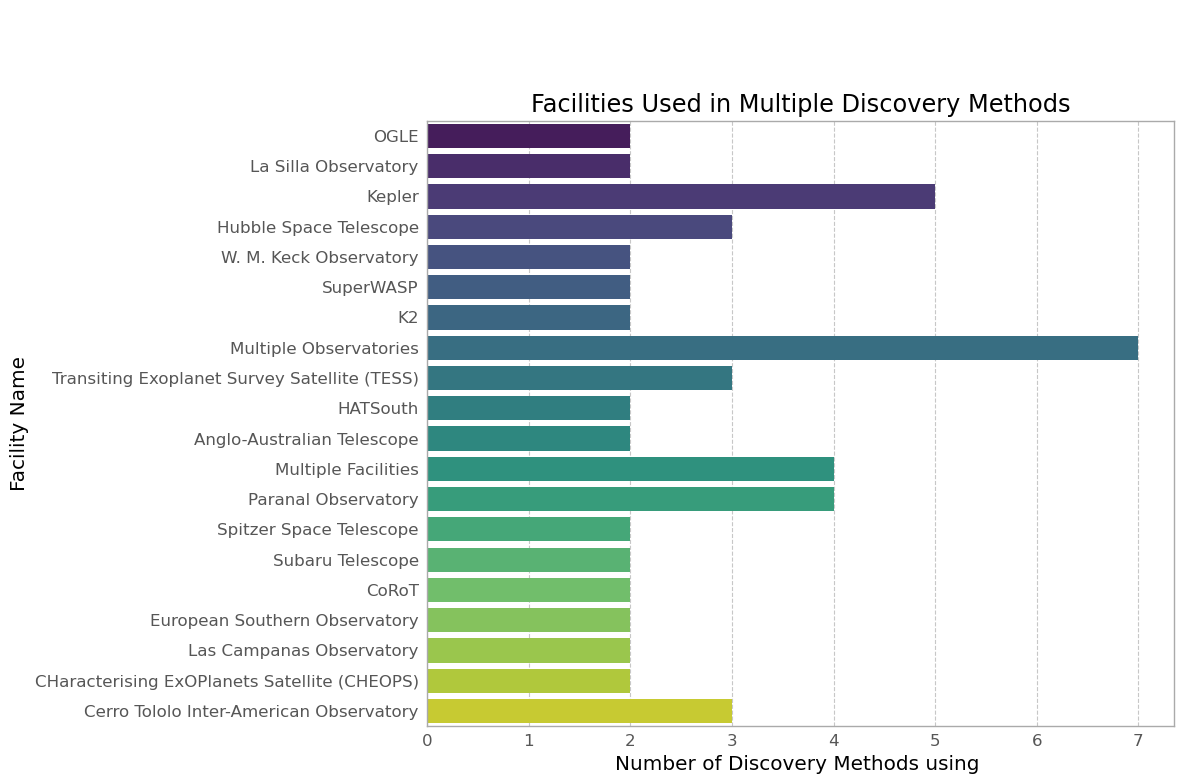

In [56]:

# E4) Plotting discovery facilities involved in more than one discovery methods:-

from collections import defaultdict
import seaborn as sns

facility_methods = defaultdict(set)

for _, row in df[['disc_facility', 'discoverymethod']].dropna().iterrows():
    facility_methods[row['disc_facility']].add(row['discoverymethod'])

# Filter those used in more than 1 method
shared_facilities = {fac: methods for fac, methods in facility_methods.items() if len(methods) > 1}

print(f"\nFacilities used in multiple methods: {len(shared_facilities)}\n")
for fac, methods in shared_facilities.items():
    print(f"{fac}: {methods}")

shared_counts = [len(methods) for methods in shared_facilities.values()]
labels = list(shared_facilities.keys())


plot.figure(figsize=(12, 8))
sns.barplot(x=shared_counts, y=labels, hue=labels, palette='viridis',dodge=False, legend=False)
plot.xlabel('Number of Discovery Methods using ')
plot.ylabel('Facility Name')
plot.title('\n\n\nFacilities Used in Multiple Discovery Methods')
plot.legend([],[], frameon=False)
plot.tight_layout()
plot.grid(axis='x', linestyle='--', alpha=0.7)
plot.show()

## F) Understanding the Architecture of exoplanet systems(Bi/Multivariative)

#### F1) Distribution of planetary systems based on the number of planets and stars they contain and visualize using a sunburst chart.

In [57]:
 ## F) Understanding the Architecture of exoplanet systems
# F1) Distribution of planetary systems based on the number of planets and stars they contain and visualize using a sunburst chart.

import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt 

systems = df.groupby('hostname')['pl_name'].count()
systems_df = df[['hostname', 'sy_pnum', 'sy_snum']].drop_duplicates()
print("G1) The total number of distinct systems found are:-",df['hostname'].nunique())

discovery_methods = df[['hostname', 'discoverymethod']].drop_duplicates(subset='hostname')

# Merge discovery methods into system data
systems_with_methods = systems_df.merge(discovery_methods, on='hostname', how='left')

# View result
print(systems_with_methods.head())

# Group the data to get counts (or you can use actual values if you have them)
data = systems_df.groupby(['sy_pnum', 'sy_snum']).size().reset_index(name='value')
#print(data)
print(df[df['sy_snum'] == 4]['sy_pnum'].value_counts())

fig = px.sunburst(
    data,
    path=['sy_pnum','sy_snum'],  # Use actual column names
    values='value',
    title='Sunburst Chart of sy_snum within sy_pnum',
    color='sy_pnum',
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig.update_layout(
    width=550,
    height=550
)
fig.show()

print(f"""INTERPRETATION :- There are {df['hostname'].nunique()} systems found till now. Out of it, mojority systems have a sinlge star and single planet.The planet 
number in systems range from 1 to 8 in which most have Solitary star.""")

G1) The total number of distinct systems found are:- 4074
     hostname  sy_pnum  sy_snum  discoverymethod
0  OGLE-TR-10        1        1          Transit
1  BD-08 2823        2        1  Radial Velocity
2     HR 8799        4        1          Imaging
3   HD 110014        1        1  Radial Velocity
4    HIP 5158        2        1  Radial Velocity
sy_pnum
1    2
Name: count, dtype: int64


INTERPRETATION :- There are 4074 systems found till now. Out of it, mojority systems have a sinlge star and single planet.The planet 
number in systems range from 1 to 8 in which most have Solitary star.


#### F2) Analysis of colour differences of host star of different systems from its temperature differences and plot it using upsetplot

 

There are only 4074 unique host stars in dataset but there are 4114 distinct colour for distinct 
host stars.This is because the colours of 40 stars have multiple records.These can be analysed with upset plot.




<Figure size 1000x600 with 0 Axes>

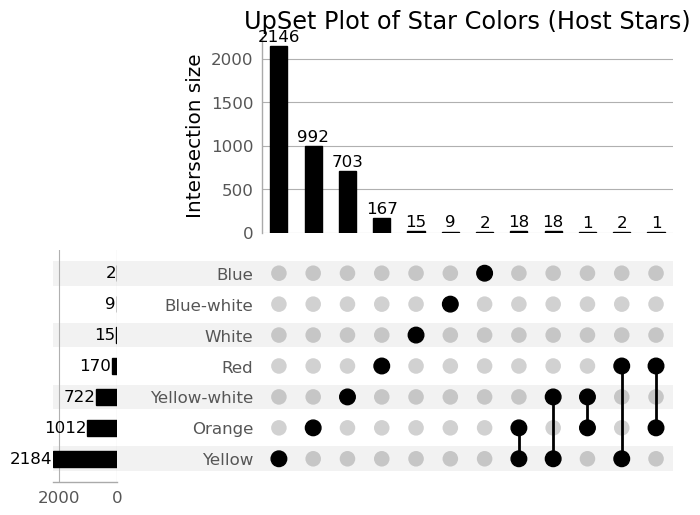

In [58]:

#F2) Analysis of colour differences of host star of different systems from its temperature differences and plot it using upsetplot

from upsetplot import UpSet, from_memberships
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

# Step 1: Define the color classifier
def classify_star_color(temp):
    if temp > 30000:
        return 'Blue'
    elif temp > 10000:
        return 'Blue-white'
    elif temp > 7500:
        return 'White'
    elif temp > 6000:
        return 'Yellow-white'
    elif temp > 5200:
        return 'Yellow'
    elif temp > 3700:
        return 'Orange'
    else:
        return 'Red'

#print(df['hostname'].nunique())
df['colour'] = df['st_teff'].apply(classify_star_color)
host_color = df[['hostname', 'colour']].drop_duplicates()
Multiple_colour = df.groupby('hostname')['colour'].nunique()
Multiple_colour = Multiple_colour[Multiple_colour>1]
#print(len(Multiple_colour))


print(f""" \n\nThere are only {df['hostname'].nunique()} unique host stars in dataset but there are {host_color.shape[0]} distinct colour for distinct 
host stars.This is because the colours of {(len(Multiple_colour))} stars have multiple records.These can be analysed with upset plot.\n\n""")


color_sets = host_color.groupby('hostname')['colour'].apply(set)
memberships = color_sets.value_counts()  # This aggregates by group
data = from_memberships(memberships.index, data=memberships.values)



plt.figure(figsize=(10,6))
upset = UpSet(data, show_counts=True, sort_by='degree')
upset.plot()
plt.title("UpSet Plot of Star Colors (Host Stars)")
plt.show()

#### F3) Overview of top 3 discovery methods on exoplanet solar systems


Total count of discovery method for each exoplanet is :- 4074
Total number of times transit, radial velocity and imaging used to find exoplanets:- 3850 

Hence, it means 70.38% of exoplanets are found by Transit,Radial velocity and Imaging methods.





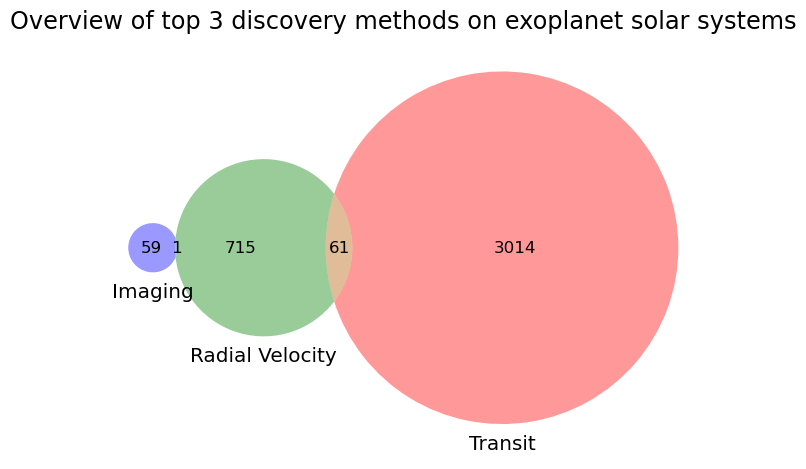



INTERPRETATION:- The solar systems found by transit method alone is highest and radial velocity alone is second highest. There are 61 systems
 where the exoplanets in it are discovered by both transit and radial velocity. There is 1 system where the exoplanets in it are discovered by radial
 velocity and imaging.


In [59]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

print("\nTotal count of discovery method for each exoplanet is :-",df['hostname'].nunique())
Top_3 = df[df['discoverymethod'].isin(['Transit', 'Radial Velocity', 'Imaging'])].groupby('hostname').size()
print("Total number of times transit, radial velocity and imaging used to find exoplanets:-",Top_3.count(),"\n")
print(f"""Hence, it means {round((Top_3.count()/df['discoverymethod'].count())*100,2)}% of exoplanets are found by Transit,Radial velocity and Imaging methods.
\n\n""")


venn_data = df[['hostname', 'discoverymethod']].dropna().drop_duplicates()

# Create sets for 3 most common methods
transit_circle = set(venn_data[venn_data['discoverymethod'] == 'Transit']['hostname'])
rv_circle = set(venn_data[venn_data['discoverymethod'] == 'Radial Velocity']['hostname'])
imaging_circle = set(venn_data[venn_data['discoverymethod'] == 'Imaging']['hostname'])

transit = transit_circle - rv_circle - imaging_circle
rv = rv_circle - transit_circle - imaging_circle
imaging = imaging_circle - transit_circle - rv_circle

transit_rv = (transit_circle & rv_circle) - imaging_circle
transit_imaging = (transit_circle & imaging_circle) - rv_circle
rv_imaging = (rv_circle & imaging_circle) - transit_circle

all_three = transit_circle & rv_circle & imaging_circle


set1 = transit_circle
set2 = rv_circle
set3 = imaging_circle

plt.figure(figsize=(8,6))

venn3(
    [set1, set2, set3],
    set_labels=('Transit', 'Radial Velocity', 'Imaging')
)
plt.title("Overview of top 3 discovery methods on exoplanet solar systems")
plt.show()
print("""\n\nINTERPRETATION:- The solar systems found by transit method alone is highest and radial velocity alone is second highest. There are 61 systems
 where the exoplanets in it are discovered by both transit and radial velocity. There is 1 system where the exoplanets in it are discovered by radial
 velocity and imaging.""")

## G) 3D Map of distribution of exoplanets(multivariative)

In [60]:

# H)  3D Map of distribution of exoplanets
import os
os.environ["OMP_NUM_THREADS"] = "1"  

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd            
import numpy as np              
import plotly.express as px      
from astropy.coordinates import SkyCoord  
import astropy.units as u  
import plotly.graph_objects as go

df = df.dropna(subset=['ra', 'dec', 'sy_dist'])

discovery_year = df['disc_year'].value_counts().sort_index()
year_df = discovery_year.reset_index()
year_df.columns = ['year', 'count']

X = StandardScaler().fit_transform(year_df[['count']])
kmeans = KMeans(n_clusters=10, random_state=42)
year_df['cluster'] = kmeans.fit_predict(X)

cluster_order = (year_df.groupby('cluster')['year'].min().sort_values().index)

#year_to_cluster = dict(zip(year_df['year'], year_df['cluster']))
sorted_cluster_map = {old: new for new, old in enumerate(cluster_order)}
year_df['cluster'] = year_df['cluster'].map(sorted_cluster_map)
df['cluster'] = df['disc_year'].map(dict(zip(year_df['year'], year_df['cluster'])))

ra_rad = np.deg2rad(df['ra'])
dec_rad = np.deg2rad(df['dec'])
r = df['sy_dist']  


df['x'] = r * np.cos(dec_rad) * np.cos(ra_rad)
df['y'] = r * np.cos(dec_rad) * np.sin(ra_rad)
df['z'] = r * np.sin(dec_rad)

# Plot using Plotly
fig = px.scatter_3d(df, x='x', y='y', z='z',
                    hover_name = 'pl_name' if 'pl_name' in df.columns else None,
                    color= 'cluster',  # Color by distance
                    color_continuous_scale = 'inferno',
                    title='\nH) 3D Map of Exoplanet Systems',
                    labels={'x': 'X (ly)', 'y': 'Y (ly)', 'z': 'Z (ly)'})

fig.update_traces(marker=dict(size=3))
fig.update_layout(scene_aspectmode='data')
fig.show()


ranges = (
    year_df.groupby('cluster').agg(min_year=('year', 'min'), max_year=('year', 'max'), no_of_years=('year', 'count'))
    .sort_values('min_year').reset_index()
)

cluster_counts = df['cluster'].value_counts().rename_axis('cluster').reset_index(name='count')

# Merge counts into ranges on 'cluster'
ranges = ranges.merge(cluster_counts, on='cluster', how='left')

#print(ranges)

print("The cluster ranges of each of the 10 clusters are:\n\n", ranges)


print("""\n\nINTERPRETATION :- Eventhough the clusters are spread out, there is a small correlation between the direction and the discovery year from 
the 3D plot. The exoplanets at northern sky from earth are mostly in cluster 5 indicate most of them where discovered in 2016. The exoplantes at 
southeren sky are mostly clustred in 6 to 9 indicates the most of the exoplantes at that position were discovered after 2018""")
                                                                           
## You can color by: Spectral type,Planet count,Detection method.



The cluster ranges of each of the 10 clusters are:

    cluster  min_year  max_year  no_of_years  count
0        0      1992      2001            9     58
1        1      2002      2007            6    197
2        2      2008      2010            3    256
3        3      2011      2017            5    711
4        4      2014      2014            1    875
5        5      2016      2016            1   1517
6        6      2018      2018            1    324
7        7      2019      2023            3    640
8        8      2021      2021            1    526
9        9      2022      2022            1    366


INTERPRETATION :- Eventhough the clusters are spread out, there is a small correlation between the direction and the discovery year from 
the 3D plot. The exoplanets at northern sky from earth are mostly in cluster 5 indicate most of them where discovered in 2016. The exoplantes at 
southeren sky are mostly clustred in 6 to 9 indicates the most of the exoplantes at that position we

## H) The limits of orbital shapes of discovered exoplanets(multivariative)

I) Out of 5470 non-null rows, we can resume to find the maximum and minimun orbits.
Planet with max eccentricity: HD 20782 b e = 0.95
Planet with min eccentricity: LP 791-18 c e = 8e-05 




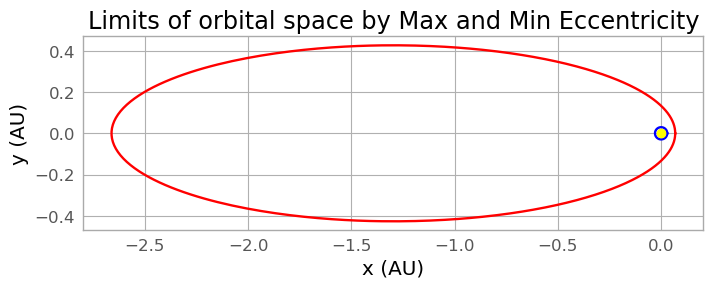

INTERPRETATION :- We found the limits of orbital shape ever found. All other orbits fall between these two orbital shapes.


In [61]:

#I) The limits of orbital shapes of discovered exoplanets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df.dropna(subset=['pl_orbsmax', 'pl_orbeccen'])
print(f"I) Out of {df['pl_orbeccen'].count()} non-null rows, we can resume to find the maximum and minimun orbits.")

min_ecc = df[df['pl_orbeccen']>0]['pl_orbeccen'].min()
max_ecc = df[df['pl_orbeccen']>0]['pl_orbeccen'].max() 

planet_min = df[df['pl_orbeccen']==min_ecc].iloc[0]
planet_max = df[df['pl_orbeccen']==max_ecc].iloc[0]
print("Planet with max eccentricity:", planet_max['pl_name'], "e =", max_ecc)
print("Planet with min eccentricity:", planet_min['pl_name'], "e =", min_ecc,"\n\n")

def orbit_cords(a, e, num=1000):
    theta = np.linspace(0, 2 * np.pi, num)
    r = (a * (1 - e**2)) / (1 + e * np.cos(theta))
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# Retrieve a and e
a_max = planet_max['pl_orbsmax']
e_max = planet_max['pl_orbeccen']

a_min = planet_min['pl_orbsmax']
e_min = planet_min['pl_orbeccen']

x_max, y_max = orbit_cords(a_max, e_max)
x_min, y_min = orbit_cords(a_min, e_min)

# 5. Plot both orbits
plt.figure(figsize=(8, 8))
plt.plot(x_max, y_max, label=f"Max e: {planet_max['pl_name']} (e={e_max:.2f})", color='red')
plt.plot(x_min, y_min, label=f"Min e: {planet_min['pl_name']} (e={e_min:.2f})", color='blue')
plt.scatter([0], [0], color='yellow', label='Star (focus)', zorder=5)

plt.gca().set_aspect('equal')
plt.title("Limits of orbital space by Max and Min Eccentricity")
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.grid(True)
#plt.legend()
plt.show()

print("INTERPRETATION :- We found the limits of orbital shape ever found. All other orbits fall between these two orbital shapes.")

# TASK 4: Documentation, Insights & Presentation

### Conclusion:-

This project explored NASA's Exoplanet Archive to understand about exoplanetary systems. The project used EDA tools like PCA, KMeans,clustering and visualizations techniques like line charts, scatter plots, radar charts, sunburst, upset plots, Venn diagrams, 3D scatter plots, Mollweide projections to get useful insights. The Objective of the project is to Explore and Visualize architecture of planetary systems. The findings from the project are :-

#### General Discoveries:- 🗺️

* The solar system with the most planets discovered is KOI-351 with 8 planets similar to our solar system.
* Top 10 nearest exoplanets are within 3.6 light-years from Earth.
* Exoplanet discovery peaked in 2016 with over 1517 planets discovered and was lowest at 1994 with 1 exoplanet being discovered.
* Most exoplanets are found at about 270 degree radius and K-Means indicates that there is no clear pattern for distribution of similar exoplanets around earth. 
* 3D distribution shows exoplanets at northern sky from earth were mostly discovered in 2016 and exoplantes at southeren sky are mostly discovered after 2018.


#### Discovery Methods & Facilities 🛰️ 

* The Transit method is the most widely used discovery method.
* The Transit, Radial velocity and Imaging methods uses most discovery facilites and they contribute to 70.38% of exoplanet discoveries.
* Multiple observatories and Kepler are the most versatile discovery facilities. Multiple observatories is used in 7 and Kepler is used in 5 distinct discovery methods. 
* Several facilities contributed to more than one discovery method, showing collaboration and tool versatility.

#### Earth-like Planets 🌍 

* Around 3 planets show similarities to Earth in terms of size, temperature, and stellar conditions. They are Kepler-62e, Kepler-62f and Kepler-452b. 
* There position is spotted using mollweide projection and characteristics are compared to earth using radar chart.

#### Exoplanet System Architecture 🌐

* There are 4074 systems found till now.
* Most exoplanet systems contain 1–3 planets, with single-star systems being most common.
* The stellar temperature influences the colour of host stars and 54 stars out of 4074 exhibited more than one colour
* The Solar Systems show a wide range of orbital eccentricities.

#### Correlations & Patterns 🔄

* PCA shows cooler,smaller stars have larger orbital periods and eccentricities. The Orbital period, eccentricity and Semi-major axis are closely correlated.
* Strong positive correlation found between stellar temperature and planetary temperature.
* Heatmap gives a suprising fact that direction and position of a system can affect the number of planets in a system and also convey if size of planets increases,the number of planets in the system decreases.


